# CS 6140 Machine Learning: Assignment - 2  

## Total Points: 100

## Prof. Ahmad Uzair

This assignment requires implementation from scratch. You can use other libraries to tally your results.

### Problem 1. (20 points)

Consider a logistic regression problem where $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Y} = \left\{ -1, +1\right\}$. Derive the weight update rule that maximizes the conditional likelihood assuming that a data set $\mathcal{D}=\left\{ (\boldsymbol{x}_{i},y_{i})\right\} _{i=1}^{n}$ is given.

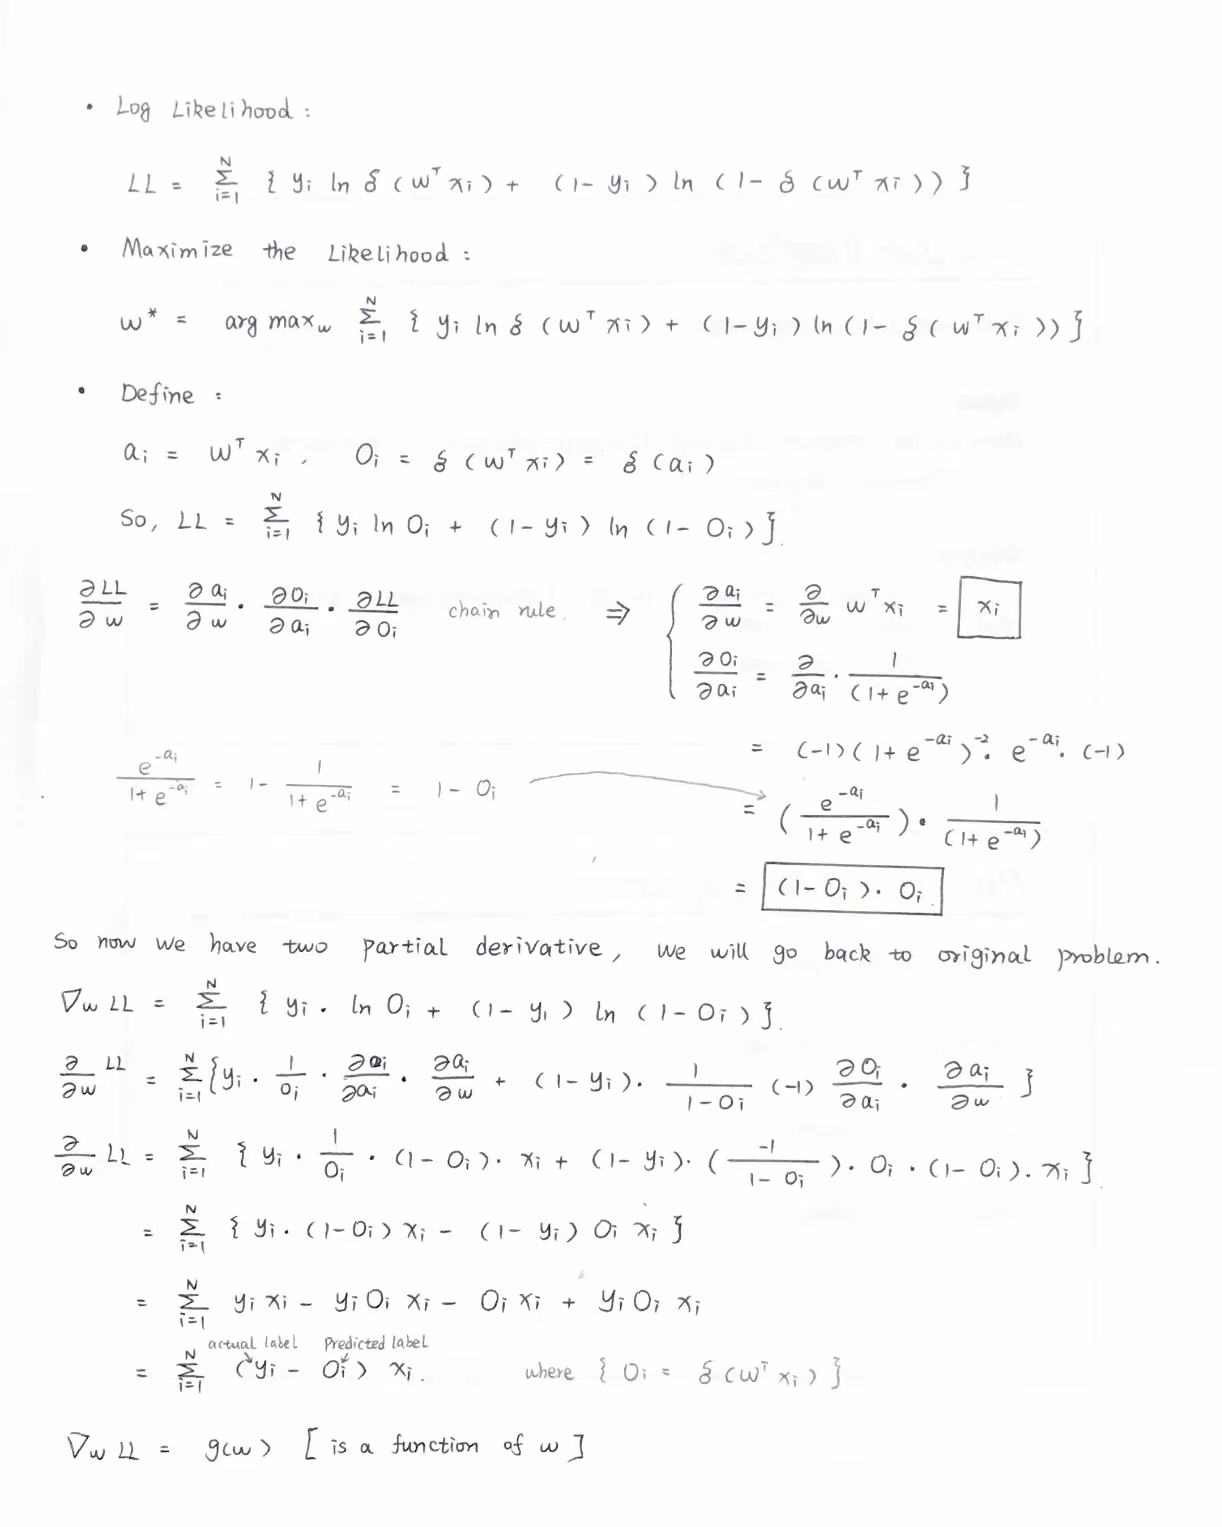

In [1]:
from IPython.display import Image
Image("Assig2Prob1.jpg")

### Problem 2. (20 points) 
The sigmoid function is given as: 
    $\sigma(a)=\frac{1}{1+e^{-a}}$
 Solve the following questions.

a. (5 points) Compute $\frac{d\sigma(a)}{dx} $ when $\ a = w^Tx $, where $\ w, x \hspace{2 pt} \in \hspace{2 pt} \mathbb{R}^m $

b. (5 points) For logistic regression with target variable $ y_i \hspace{2pt} \epsilon \hspace{2 pt} \{−1, 1\}$, the posterior probability of the positive class is:
\begin{equation}
    P(y = 1|x,w)=\sigma(w^Tx) =\frac{1}{1 + e^{-w^Tx}}
\end{equation}

Show that we can express the posterior for both classes as:

\begin{equation}
    P(y = \pm 1|x,w)= \sigma(w^Tx)= \frac{1}{1 + e^{-yw^Tx}}
\end{equation}

c. (10 points) Show that the loss function for logistic regression is:

\begin{equation}
    L_{log} = \sum\limits_{i=1}^N \log(1 + e^{-y_iw^Tx_i})
\end{equation}

where, $x_i , w \hspace{2 pt} \epsilon \hspace{2 pt} \mathbb{R}^m \hspace{2 pt}and\hspace{2 pt} y_i \hspace{2 pt}\in \hspace{2 pt} \{\pm 1\}$

We can see that the expression in the exponent i.e., $\ y_iw^Tx_i $ is a product of the given training label $\ y_i$ and the dot product of the weight vector with the input feature vector $\ g(x_i, w) = w^Tx_i$. Please explain how the loss function behaves when the training label and dot product have the same sign (positive/negative) and when they differ.

### Answer:

a. Since $a = w^Tx$ and $\sigma(a)=\frac{1}{1+e^{-a}}$, $\frac{d\sigma(a)}{dx} = \frac{d(1+e^{-w^Tx})^{-1}}{dx} = (-1)(1+e^{-w^Tx})^{-2}(-w^T)(e^{-w^Tx}) = \frac{w^Te^{-w^Tx}}{(1 + e^{-w^Tx})^{-2}}$

b. In the binary classification, when the valuelogistic regression with target variable $ y_i \hspace{2pt} \epsilon \hspace{2 pt} \{−1, 1\}$, the posterior probability is:
\begin{equation}
    P(y = 1|x,w)=\sigma(w^Tx) =\frac{1}{1 + e^{-w^Tx}}\\
    P(y = -1|x,w)=1-\sigma(w^Tx) =\frac{1}{1 + e^{w^Tx}}
\end{equation}
Since y could only take -1 or 1, we could combine two equations into one equation:
\begin{equation}
    P(y = \pm 1|x,w)= \sigma(w^Tx)= \frac{1}{1 + e^{-yw^Tx}}
\end{equation}

c. Since we have $P(y = \pm 1|x,w)= \sigma(w^Tx)= \frac{1}{1 + e^{-yw^Tx}}$, we could multiply all probabilities to get likelihood function:
\begin{equation}
    L(w)= \prod\limits_{i=1}^N \frac{1}{1 + e^{-y_i w^Tx_i}}
\end{equation}
We want to find one of the possible values of w that maximizes the likelihood function, so we have maximum likelihood estimation (MLE):
\begin{equation}
    w= argmax_w (\prod\limits_{i=1}^N \frac{1}{1 + e^{-y_i w^Tx_i}})
\end{equation}
The cost function with the $\prod$ is not easy to optimize, we take the natural log of the likelihood function and add negative sign because the maximizing the log likelihood is equivalent to minimizing the negative log likelihood (NLL):
\begin{equation}
    Cost(w) = -log L(w)\\
         = -\sum\limits_{i=1}^N \frac{1}{1 + e^{-y_i w^Tx_i}}\\
         = -\sum\limits_{i=1}^N log(1) - log(1 + e^{-y_i w^Tx_i})\\
         = \sum\limits_{i=1}^N \log(1 + e^{-y_iw^Tx_i})
\end{equation}
where, $x_i , w \hspace{2 pt} \epsilon \hspace{2 pt} \mathbb{R}^m \hspace{2 pt}and\hspace{2 pt} y_i \hspace{2 pt}\in \hspace{2 pt} \{\pm 1\}$

### Q4. Perceptron & Logistic Regression  (60 points)
In this problem you will be applying logistic regression to the breastcancer dataset for binary classification:

**Breast Cancer**:  this dataset is aimed at developing classifiers that can distinguish be-tween malignant and benign tumors in breast cancer.   There are thirty real valued features and 569 instances.

The dataset can be accessed here: <html>https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)</html>

### Task
a. Implement perceptron with bias on the dataset. 

b. Implement logistic regression using gradient descent. Do ten-fold cross validation and find the best step-size $\alpha$, using accuracy as the metric. 

c. Finally, use the best $\alpha$ you get and re-train both the model on the full training data, and report the accuracy, precision and recall.


Rubrix for Problem 4:

a. Implementation of perceptron with weight update function. (10 points)

b. Implementation of loss function and sigmoid (10 points)

c. Implementation of Gradient descent & evaluation (10 points)

d. Implementation of cross validation (10 points)

e. Retraining perceptron and logistic regression with whole training set with selected alpha value  (10 points)

f. Compare the results of logistic regression with that of perceptron. (10  points)

<b>As a reminder all functions for this problem have to be coded from scratch</b>

### Data preprocessing for perceptron

In [2]:
# import data from data file
import numpy as np
import pandas as pd

PATH = "breast-cancer-wisconsin.data"

# create attribute name for each data column
attribute_names = ['Sample code number', 
                  'Clump Thickness', 
                  'Uniformity of Cell Size', 
                  'Uniformity of Cell Shape', 
                  'Marginal Adhesion',
                  'Single Epithelial Cell Size',
                  'Bare Nuclei',
                  'Bland Chromatin',
                  'Normal Nucleoli', 
                  'Mitoses',          
                  'Class']

dataset = pd.read_csv(PATH, names = attribute_names)

In [3]:
# data preprocessing - since there has some "?", we use Nan to replace
dataset = dataset.replace(to_replace = "?", value = np.nan)
# then drop the missing value
dataset = dataset.dropna(how = 'any')
# check if there leave any Nan
null_all = dataset.isnull().sum()
print(null_all)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [4]:
# set the label to 1 or -1
temp = np.where(dataset[attribute_names[10]] == 4, 1, -1)
dataset[attribute_names[10]] = temp

In [5]:
# shuffle the data
dataset = dataset.sample(frac=1).reset_index(drop=True)
# split data into 10 set
dataset = np.array_split(dataset, 10)

### Perceptron

In [6]:
"""
Input parameters:
    x: data input
    y: output
    eta: learning rate
    n_epoch: iteration
"""
import numpy as np

class perceptron:
    def __init__(self, eta=0.01, n_epoch=100):
        self.eta = eta
        self.n_epoch = n_epoch
    
    def activated(self, x):
        return np.where(self.f_x(x) >= 0.5, 1, -1)
    
    def fit(self, x, y):
        # in case no data
        if len(x) == 0:
            return
        
        n_samples, n_features = x.shape # get the data's shape
        # initialize weight vector to zeros
        self.weights = np.zeros((n_features + 1))
        self.bias = list()
        
        for epoch in range(self.n_epoch):
            # iterate all sample, and update weight by perceptron classification rule
            error = 0
            for xi, yi in zip(x, y):
                w = self.eta * (yi - self.activated(xi))
                # update weight
                self.weights[0] += w
                self.weights[1:] += w * xi
                # if w_new != 0, predict incorrect
                error += int(w != 0.0)
            self.bias.append(error)
        return self
    
    # absorb the threshold in the weight vector by augmenting the iput features with a dummy feature that is always 1
    def f_x(self, x):
        # ϕ(z) = w0 * 1 + w1∗x1 + w2∗x2 + ... + wm∗xm
        f = self.weights[0] * 1 + np.dot(x, self.weights[1:])
        return f
    
    def predict(self, x):
        output = list()
        for xi in x:
            output.append(int(self.activated(xi)))
        return np.array(output)
    
    def accuracy(self, y_pred, y):
        if(y_pred.shape != y.shape):
            raise Value("Prediction output has wrong shape")
        return (y_pred == y).sum() / float(y.size)

In [7]:
p = perceptron()

In [8]:
# split the data to 80% traning and 20% testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy

for i in range(10):
    dataset_copy = copy.deepcopy(dataset)
    dataset_copy.pop(i)
    dataset_copy = pd.concat(dataset_copy)
    X_train, y_train = dataset_copy[attribute_names[1:10]], dataset_copy[attribute_names[10]]
    X_test, y_test = dataset[i][attribute_names[1:10]], dataset[i][attribute_names[10]]
    # 1-10 column are sample data, last column is label and has two different types (benign and malignant)
    #X_train, X_test, y_train, y_test = train_test_split(data[attribute_names[1:10]], data[attribute_names[10]], test_size=0.2,  random_state=1)
    """Before applying the model, the numerical value of each feature should be converted into data 
       with mean value of 0 and variance of 1, so that the trained model will not be dominated by 
       some values with too large dimensions"""
    # standardizes the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # fit the model
    p.fit(X_train, y_train)
    
    # predict
    output = p.predict(X_test)
    # print accuracy
    acc = p.accuracy(output, y_test)
    print("The perceptron's accuracy is:", acc)

The perceptron's accuracy is: 0.9420289855072463
The perceptron's accuracy is: 0.9130434782608695
The perceptron's accuracy is: 0.8985507246376812
The perceptron's accuracy is: 0.9411764705882353
The perceptron's accuracy is: 0.9411764705882353
The perceptron's accuracy is: 0.9705882352941176
The perceptron's accuracy is: 0.9558823529411765
The perceptron's accuracy is: 0.9411764705882353
The perceptron's accuracy is: 0.9852941176470589
The perceptron's accuracy is: 0.9558823529411765


### Data preprocessing for logistic regression

In [12]:
# import data from data file
import numpy as np
import pandas as pd

PATH = "breast-cancer-wisconsin.data"

# create attribute name for each data column
attribute_names = ['Sample code number', 
                  'Clump Thickness', 
                  'Uniformity of Cell Size', 
                  'Uniformity of Cell Shape', 
                  'Marginal Adhesion',
                  'Single Epithelial Cell Size',
                  'Bare Nuclei',
                  'Bland Chromatin',
                  'Normal Nucleoli', 
                  'Mitoses',          
                  'Class']

data = pd.read_csv(PATH, names = attribute_names)

# data preprocessing - since there has some "?", we use Nan to replace
data = data.replace(to_replace = "?", value = np.nan)
# then drop the missing value
data = data.dropna(how = 'any')
# check if there leave any Nan
null_all = data.isnull().sum()
print(null_all)

# set the label to 0 or 1
temp = np.where(data[attribute_names[10]] == 4, 0, 1)
data[attribute_names[10]] = temp

# shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
# split data into 10 set
dataset = np.array_split(data, 10)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


### Logistic Regression

In [13]:
class logisticRegression:
    def __init__(self, alpha=0.1, n_epoch=100):
        self.alpha = alpha
        self.n_epoch = n_epoch
        
    #  activation function - sigmoid function: takes an input which ranges from negative infinity to positive infinity 
    # and output a number between 0 and 1
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def gradient(self, w, b, X, y):
        m = X.shape[1]
        hypothesis = self.sigmoid(np.dot(w.T, X) + b)
        # cross entropy loss
        cost = -1 / m * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
        # calculate weight w gradient
        dw = 1 / m * np.dot(X, (hypothesis - y).T)
        db = 1 / m * np.sum(hypothesis - y)
        grads = {'dw': dw, 'db': db}
        return grads, cost
    
    # gradient desend follow w_new = w_old - alpha * radient of E(w_old)
    def gradientDesent(self, w, b, X, y):
        costs = list()
        for epoch in range(self.n_epoch):
            grads, cost = self.gradient(w, b, X, y)
            dw, db = grads['dw'], grads['db']
            # update w and b
            w -= self.alpha * dw
            b -= self.alpha * db
            costs.append(cost)
        # same the important variables to a dict
        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}
        return params, grads, costs
    
    def predict(self, w, b, X):
        m = X.shape[1]
        predict = np.zeros((1, m)) # initialize
        hypothesis = self.sigmoid(np.dot(w.T, X) + b)
        for i in range(hypothesis.shape[1]):
            if hypothesis[0, i] <= 0.5:
                predict[0, i] = 0
            else:
                predict[0, i] = 1
        return predict
    
    def accuracy(self, y_pred, y):
        return (y_pred == y).sum() / float(y.size)
    
    def model(self, X_train, y_train, X_test, y_test):
        w, b = np.zeros((X_train.shape[0], 1)), 0  # initialize w and b
        params, grads, costs = self.gradientDesent(w, b, X_train, y_train)
        w, b = params['w'], params['b']
        predict_test = self.predict(w, b, X_test)
        acc = self.accuracy(predict_test, y_test)
        print("The logistic regression's accuracy is:", acc)

In [14]:
l = logisticRegression()

In [15]:
for i in range(10):
    dataset_copy = copy.deepcopy(dataset)
    dataset_copy.pop(i)
    dataset_copy = pd.concat(dataset_copy)
    X_train, y_train = dataset_copy[attribute_names[1:10]], dataset_copy[attribute_names[10]]
    X_test, y_test = dataset[i][attribute_names[1:10]], dataset[i][attribute_names[10]]
    # 1-10 column are sample data, last column is label and has two different types (benign and malignant)
    #X_train, X_test, y_train, y_test = train_test_split(data[attribute_names[1:10]], data[attribute_names[10]], test_size=0.2,  random_state=1)
    """Before applying the model, the numerical value of each feature should be converted into data 
       with mean value of 0 and variance of 1, so that the trained model will not be dominated by 
       some values with too large dimensions"""
    # standardizes the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train, y_test = np.array(y_train), np.array(y_test)
    X_train = X_train.reshape(X_train.shape[0], -1).T
    X_test = X_test.reshape(X_test.shape[0], -1).T
    
    # fit the model
    l.model(X_train, y_train, X_test, y_test)

The logistic regression's accuracy is: 0.927536231884058
The logistic regression's accuracy is: 0.9855072463768116
The logistic regression's accuracy is: 0.9710144927536232
The logistic regression's accuracy is: 0.9852941176470589
The logistic regression's accuracy is: 1.0
The logistic regression's accuracy is: 0.9852941176470589
The logistic regression's accuracy is: 0.9852941176470589
The logistic regression's accuracy is: 0.9264705882352942
The logistic regression's accuracy is: 0.9558823529411765
The logistic regression's accuracy is: 0.9852941176470589


#### 1. Percptron
 when learning rate = 0.001, the average of accuracy is 0.947 \
 when learning rate = 0.01, the average of accuracy is 0.968 \
 when learning rate = 0.1, the average of accuracy is 0.959
#### 2. Logistic Regression
 when learning rate = 0.001, the average of accuracy is 0.969 \
 when learning rate = 0.01, the average of accuracy is 0.969 \
 when learning rate = 0.1, the average of accuracy is 0.971

#### Therefore, the best learning rate for percptron is 0.01 and for logistic is 0.1

### Re-training the whole dataset for percepton

In [16]:
# import data from data file
import numpy as np
import pandas as pd

PATH = "breast-cancer-wisconsin.data"

# create attribute name for each data column
attribute_names = ['Sample code number', 
                  'Clump Thickness', 
                  'Uniformity of Cell Size', 
                  'Uniformity of Cell Shape', 
                  'Marginal Adhesion',
                  'Single Epithelial Cell Size',
                  'Bare Nuclei',
                  'Bland Chromatin',
                  'Normal Nucleoli', 
                  'Mitoses',          
                  'Class']

dataset = pd.read_csv(PATH, names = attribute_names)

# data preprocessing - since there has some "?", we use Nan to replace
dataset = dataset.replace(to_replace = "?", value = np.nan)
# then drop the missing value
dataset = dataset.dropna(how = 'any')
# check if there leave any Nan
null_all = dataset.isnull().sum()

# set the label to -1 or 1
temp = np.where(dataset[attribute_names[10]] == 4, 1, -1)
dataset[attribute_names[10]] = temp

In [17]:
"""
Input parameters:
    x: data input
    y: output
    eta: learning rate
    n_epoch: iteration
"""
import numpy as np

class perceptron:
    def __init__(self, eta=0.01, n_epoch=100):
        self.eta = eta
        self.n_epoch = n_epoch
    
    def activated(self, x):
        return np.where(self.f_x(x) >= 0.5, 1, -1)
    
    def fit(self, x, y):
        # in case no data
        if len(x) == 0:
            return
        
        n_samples, n_features = x.shape # get the data's shape
        # initialize weight vector to zeros
        self.weights = d = np.zeros((n_features + 1))
        self.bias = list()
        
        for epoch in range(self.n_epoch):
            # iterate all sample, and update weight by perceptron classification rule
            error = 0
            for xi, yi in zip(x, y):
                w = self.eta * (yi - self.activated(xi))
                # update weight
                self.weights[0] += w
                self.weights[1:] += w * xi
                # if w_new != 0, predict incorrect
                error += int(w != 0.0)
            self.bias.append(error)
        return self
    
    # absorb the threshold in the weight vector by augmenting the iput features with a dummy feature that is always 1
    def f_x(self, x):
        # ϕ(z) = w0 * 1 + w1∗x1 + w2∗x2 + ... + wm∗xm
        f = self.weights[0] * 1 + np.dot(x, self.weights[1:])
        return f
    
    def predict(self, x):
        output = list()
        for xi in x:
            output.append(int(self.activated(xi)))
        return np.array(output)
    
    def accuracy(self, y_pred, y):
        if(y_pred.shape != y.shape):
            raise Value("Prediction output has wrong shape")
        return (y_pred == y).sum() / float(y.size)

In [18]:
p = perceptron()

# 1-10 column are sample data, last column is label and has two different types (benign and malignant)
X_train, X_test, y_train, y_test = train_test_split(dataset[attribute_names[1:10]], dataset[attribute_names[10]], test_size=0.2,  random_state=1)
"""Before applying the model, the numerical value of each feature should be converted into data 
   with mean value of 0 and variance of 1, so that the trained model will not be dominated by 
   some values with too large dimensions"""
# standardizes the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
# fit the model
p.fit(X_train, y_train)
    
# predict
output = p.predict(X_test)
# print accuracy
acc = p.accuracy(output, y_test)
print("The perceptron's accuracy is:", acc)

The perceptron's accuracy is: 0.9927007299270073


### Re-training the whole dataset for logistic regression

In [19]:
# split the data to 80% traning and 20% testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import data from data file
import numpy as np
import pandas as pd

PATH = "breast-cancer-wisconsin.data"

# create attribute name for each data column
attribute_names = ['Sample code number', 
                  'Clump Thickness', 
                  'Uniformity of Cell Size', 
                  'Uniformity of Cell Shape', 
                  'Marginal Adhesion',
                  'Single Epithelial Cell Size',
                  'Bare Nuclei',
                  'Bland Chromatin',
                  'Normal Nucleoli', 
                  'Mitoses',          
                  'Class']

data = pd.read_csv(PATH, names = attribute_names)

# data preprocessing - since there has some "?", we use Nan to replace
data = data.replace(to_replace = "?", value = np.nan)
# then drop the missing value
data = data.dropna(how = 'any')
# check if there leave any Nan
null_all = data.isnull().sum()
print(null_all)

# set the label to 0 or 1
temp = np.where(data[attribute_names[10]] == 4, 0, 1)
data[attribute_names[10]] = temp


# 1-10 column are sample data, last column is label and has two different types (benign and malignant)
X_train, X_test, y_train, y_test = train_test_split(data[attribute_names[1:10]], data[attribute_names[10]], test_size=0.2,  random_state=1)
"""Before applying the model, the numerical value of each feature should be converted into data 
   with mean value of 0 and variance of 1, so that the trained model will not be dominated by 
   some values with too large dimensions"""
# standardizes the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train, y_test = np.array(y_train), np.array(y_test)
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [20]:
class logisticRegression:
    def __init__(self, alpha=0.1, n_epoch=100):
        self.alpha = alpha
        self.n_epoch = n_epoch
        
    #  activation function - sigmoid function: takes an input which ranges from negative infinity to positive infinity 
    # and output a number between 0 and 1
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def gradient(self, w, b, X, y):
        m = X.shape[1]
        hypothesis = self.sigmoid(np.dot(w.T, X) + b)
        # cross entropy loss
        cost = -1 / m * np.sum(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
        # calculate weight w gradient
        dw = 1 / m * np.dot(X, (hypothesis - y).T)
        db = 1 / m * np.sum(hypothesis - y)
        grads = {'dw': dw, 'db': db}
        return grads, cost
    
    # gradient desend follow w_new = w_old - alpha * radient of E(w_old)
    def gradientDesent(self, w, b, X, y):
        costs = list()
        for epoch in range(self.n_epoch):
            grads, cost = self.gradient(w, b, X, y)
            dw, db = grads['dw'], grads['db']
            # update w and b
            w -= self.alpha * dw
            b -= self.alpha * db
            costs.append(cost)
        # same the important variables to a dict
        params = {'w': w, 'b': b}
        grads = {'dw': dw, 'db': db}
        return params, grads, costs
    
    def predict(self, w, b, X):
        m = X.shape[1]
        predict = np.zeros((1, m)) # initialize
        hypothesis = self.sigmoid(np.dot(w.T, X) + b)
        for i in range(hypothesis.shape[1]):
            if hypothesis[0, i] <= 0.5:
                predict[0, i] = 0
            else:
                predict[0, i] = 1
        return predict
    
    def accuracy(self, y_pred, y):
        return (y_pred == y).sum() / float(y.size)
    
    def model(self, X_train, y_train, X_test, y_test):
        w, b = np.zeros((X_train.shape[0], 1)), 0  # initialize w and b
        params, grads, costs = self.gradientDesent(w, b, X_train, y_train)
        w, b = params['w'], params['b']
        predict_test = self.predict(w, b, X_test)
        acc = self.accuracy(predict_test, y_test)
        print("The logistic regression's accuracy is:", acc)

In [21]:
l = logisticRegression()

# fit the model
l.model(X_train, y_train, X_test, y_test)

The logistic regression's accuracy is: 1.0


According to the accuracy of perceptron and logistic regression, the logistic regression looks better.